In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Feature Engineering

In [6]:
male = pd.get_dummies(df['sex'], drop_first=True, dtype = int)
df = pd.concat([male,df], axis = 1)

In [7]:
df.head()

,male,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,1,28,male,33.000,3,no,southeast,4449.46200
3,1,33,male,22.705,0,no,northwest,21984.47061
4,1,32,male,28.880,0,no,northwest,3866.85520


In [8]:
Smoker = pd.get_dummies(df['smoker'], drop_first=True, dtype = int)
df = pd.concat([Smoker,df], axis = 1)

In [9]:
df.rename({'yes' : 'Smoker'}, axis = 1, inplace = True)
df.head()

,Smoker,male,age,sex,bmi,children,smoker,region,charges
0,1,0,19,female,27.900,0,yes,southwest,16884.92400
1,0,1,18,male,33.770,1,no,southeast,1725.55230
2,0,1,28,male,33.000,3,no,southeast,4449.46200
3,0,1,33,male,22.705,0,no,northwest,21984.47061
4,0,1,32,male,28.880,0,no,northwest,3866.85520


In [10]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

## Exploratory Analysis

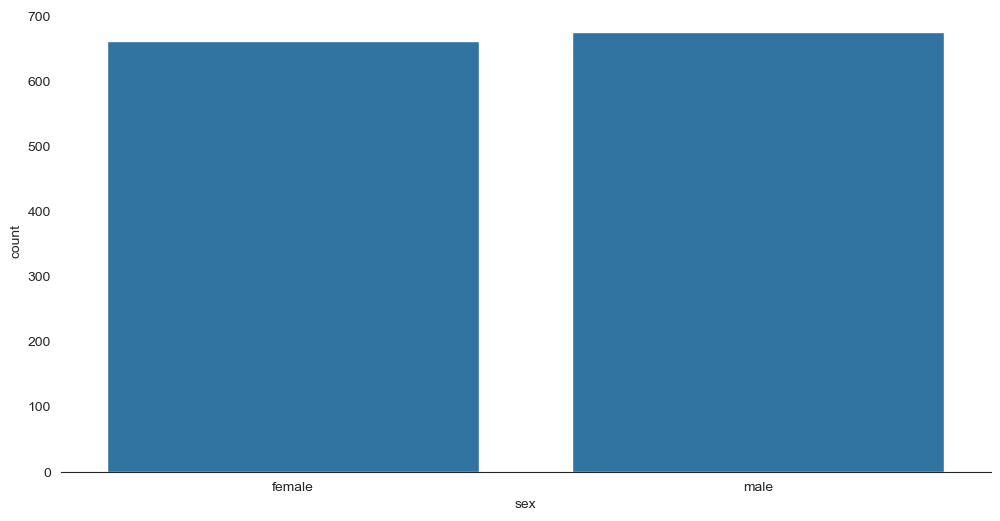

In [11]:
plt.figure(figsize = (12,6))
sns.set_style('white')
sns.countplot(df, x = 'sex')
sns.despine(left = True)

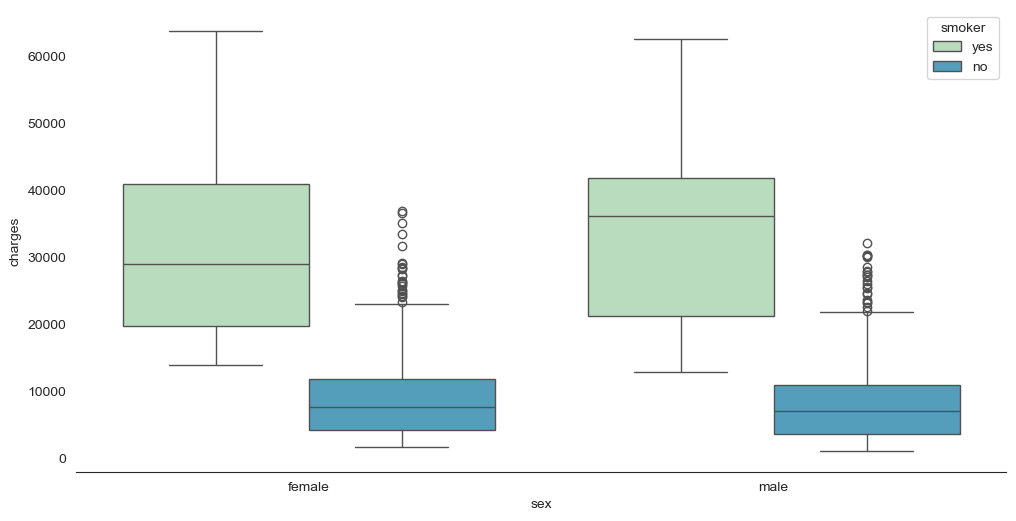

In [12]:
plt.figure(figsize = (12,6))
sns.set_style('white')
sns.boxplot(df, x = 'sex', y = 'charges', palette = 'GnBu', hue = 'smoker')
sns.despine(left = True)

<Axes: xlabel='age', ylabel='charges'>

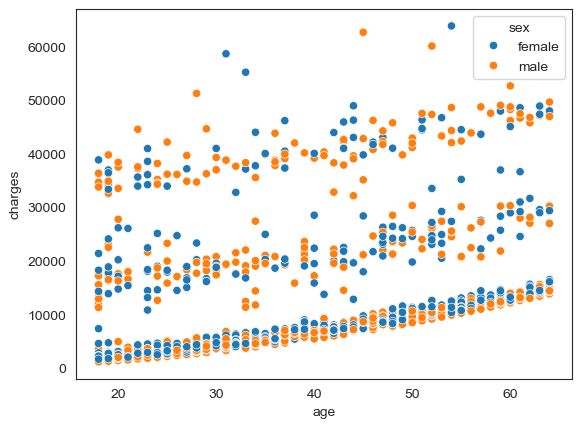

In [13]:
sns.scatterplot(df, x = 'age', y = 'charges', hue = 'sex')

<Axes: xlabel='age', ylabel='charges'>

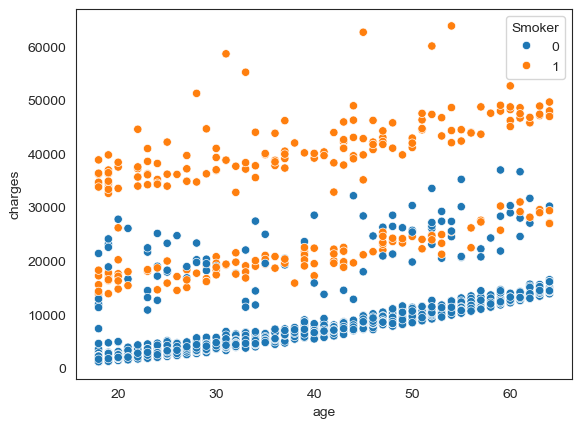

In [14]:
sns.scatterplot(df, x = 'age', y = 'charges', hue = 'Smoker')

<Axes: xlabel='age', ylabel='charges'>

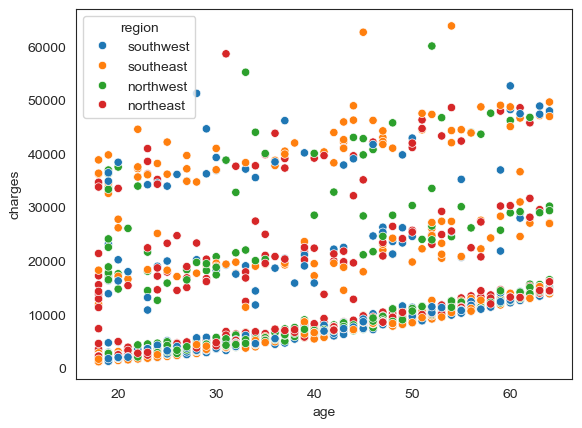

In [15]:
sns.scatterplot(df, x = 'age', y = 'charges', hue = 'region')

<Axes: xlabel='bmi', ylabel='charges'>

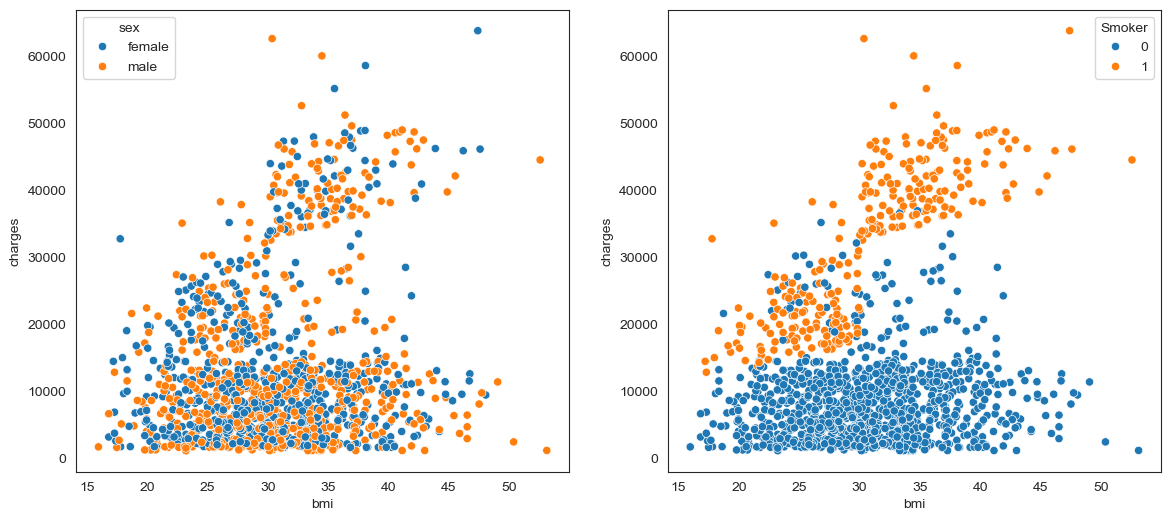

In [16]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (14,6))
sns.scatterplot(df, x = 'bmi', y = 'charges', hue = 'sex',ax = ax[0])
sns.scatterplot(df, x ='bmi', y = 'charges', hue = 'Smoker', ax = ax[1])

In [17]:
df.head()

,Smoker,male,age,sex,bmi,children,smoker,region,charges
0,1,0,19,female,27.900,0,yes,southwest,16884.92400
1,0,1,18,male,33.770,1,no,southeast,1725.55230
2,0,1,28,male,33.000,3,no,southeast,4449.46200
3,0,1,33,male,22.705,0,no,northwest,21984.47061
4,0,1,32,male,28.880,0,no,northwest,3866.85520


In [18]:
df.drop(columns =['smoker','sex', 'region'], inplace = True)

In [19]:
df.head()

,Smoker,male,age,bmi,children,charges
0,1,0,19,27.900,0,16884.92400
1,0,1,18,33.770,1,1725.55230
2,0,1,28,33.000,3,4449.46200
3,0,1,33,22.705,0,21984.47061
4,0,1,32,28.880,0,3866.85520


<Axes: >

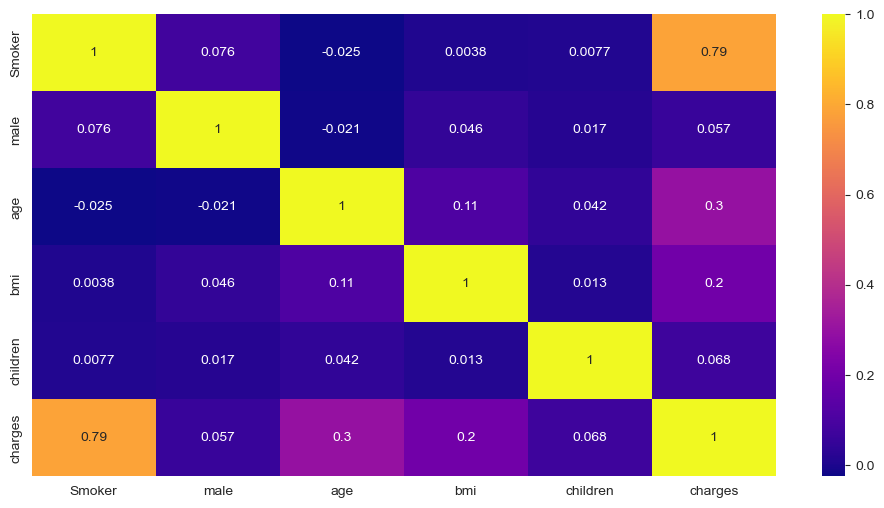

In [60]:
plt.figure(figsize = (12,6))
sns.heatmap(df.corr(), annot = True, cmap = 'plasma')

## Splitting the Data

In [61]:
x = df.drop(columns = ['charges', 'children'])
y = df['charges']

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4)

In [64]:
x_train.shape

(802, 4)

## Scaling the Data

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
scaler = StandardScaler()

In [67]:
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

In [68]:
scaled_x_train

array([[-0.50700423, -1.0278182 ,  0.43459042,  0.19548116],
       [ 1.97237012,  0.97293471,  1.0733348 ,  1.63451429],
       [ 1.97237012,  0.97293471,  0.29264723,  0.88096931],
       ...,
       [ 1.97237012,  0.97293471, -0.34609716,  0.03312871],
       [-0.50700423,  0.97293471, -1.41067113, -1.62319431],
       [-0.50700423, -1.0278182 ,  0.29264723,  0.82685182]])

## Support vector Regressor

In [69]:
from sklearn.svm import SVR

In [81]:
regressor = SVR(kernel = 'poly')

In [82]:
regressor.fit(scaled_x_train, y_train)

SVR(kernel='poly')

In [83]:
predict = regressor.predict(scaled_x_test)

In [84]:
predict

array([ 9766.16179705,  9744.63317999,  9542.64612594,  9550.75146158,
        9497.48531363,  9626.71989227,  9575.29414429, 10138.86535961,
        9730.81838406,  9579.7601701 ,  9778.176007  ,  9738.68069864,
        9468.27324212,  9556.0591901 ,  9464.63138139,  9473.92492852,
        9632.82641729,  9620.53876819,  9598.26827541,  9532.38258548,
        9550.51321612,  9528.1956936 ,  9578.0897953 ,  9791.59600451,
        9625.15777537,  9401.215066  ,  9587.07001402,  9956.18280398,
        9575.71890209,  9470.42680464,  9631.85389677,  9570.96141447,
        9756.64546356,  9777.91869364,  9824.69143373,  9551.34745964,
        9485.57101531,  9540.39226019,  9430.99219868,  9475.65168653,
        9737.60161806,  9457.10015479,  9589.81586249,  9917.90098117,
       10085.92020396,  9591.31082374,  9593.91013315,  9568.57417221,
        9588.91217657,  9468.83900355,  9531.57733219,  9567.16395134,
        9585.0045382 ,  9589.52691904,  9473.82524291,  9554.09728455,
      

<Axes: ylabel='charges'>

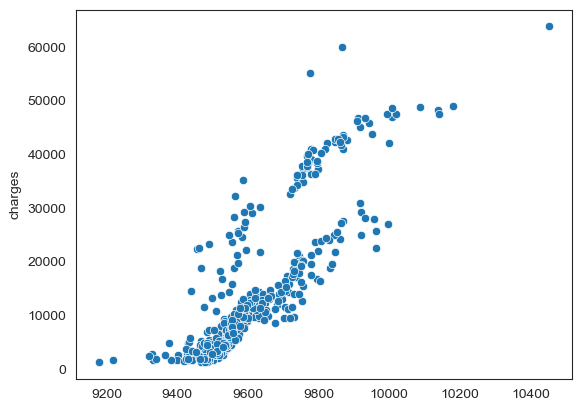

In [85]:
sns.scatterplot(x = predict, y = y_test)

## Cost Function

In [86]:
cost = np.mean((predict - y_test)**2) * 0.5

In [87]:
cost

75343624.77091761